Import libraries and datasets

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import movies dataset
movie_titles_df = pd.read_csv("/kaggle/input/recommender-sys/Movie_Id_Titles")
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
# Import ratings dataset
movies_rating_df = pd.read_csv('/kaggle/input/movies/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies_rating_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# Drop timestamp
movies_rating_df.drop(['timestamp'], axis = 1, inplace = True)
movies_rating_df

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


Exploring Data

In [5]:
movies_rating_df.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [6]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [7]:
# Merge movie and ratings dataframes
movies_rating_df = pd.merge(movies_rating_df, movie_titles_df, on = 'item_id') 
movies_rating_df

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)
...,...,...,...,...
99995,880,476,3,"First Wives Club, The (1996)"
99996,716,204,5,Back to the Future (1985)
99997,276,1090,1,Sliver (1993)
99998,13,225,2,101 Dalmatians (1996)


In [8]:
movies_rating_df.shape

(100000, 4)

Visualizing Data

In [9]:
movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [10]:
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']
ratings_df_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [11]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']

In [12]:
# Concat mean and count dataframes of the movie ratings
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)
ratings_mean_count_df.reset_index()

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


<Axes: ylabel='Frequency'>

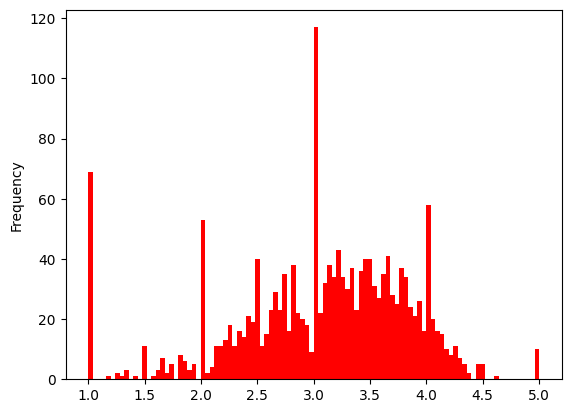

In [13]:
ratings_mean_count_df['mean'].plot(bins=100, kind='hist', color = 'r') 

<Axes: ylabel='Frequency'>

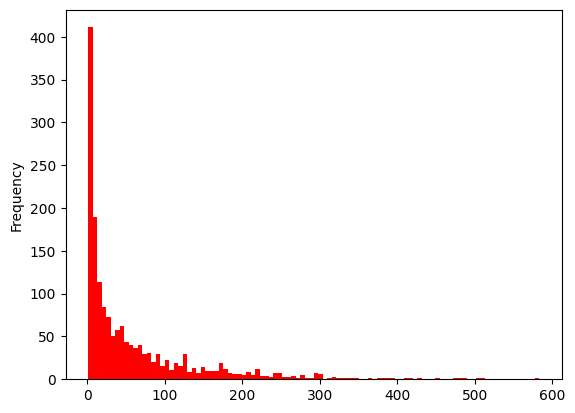

In [14]:
ratings_mean_count_df['count'].plot(bins=100, kind='hist', color = 'r') 

In [15]:
# Highest rated movies
ratings_mean_count_df[ratings_mean_count_df['mean'] == 5]

,count,mean
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


In [16]:
# Movies that are most rated
ratings_mean_count_df.sort_values('count', ascending = False).head(10)

,count,mean
title,,
Star Wars (1977),583.0,4.358491
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
"English Patient, The (1996)",481.0,3.656965
Scream (1996),478.0,3.441423
Toy Story (1995),452.0,3.878319
Air Force One (1997),431.0,3.631090


Item Based Collaborative Filtering on all movies

In [17]:
userid_movietitle_matrix = movies_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Correlations between all movies in the dataframe with pearson - standard correlation coefficient
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)

In [19]:
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Insert your own rating
myRatings = pd.read_csv("/kaggle/input/recommender-sys/My_Ratings.csv")
myRatings

,Movie Name,Ratings
0,Titanic (1997),4
1,Toy Story (1995),3


Similar movies list

In [23]:
similar_movies_list = pd.Series()
for i in range(0, 2):
    similar_movie = movie_correlations[myRatings['Movie Name'][i]].dropna() # Same movies with same ratings
    similar_movie = similar_movie.map(lambda x: x * myRatings['Ratings'][i]) # Scale the similarity by given ratings
    similar_movies_list = similar_movies_list._append(similar_movie)
    

/tmp/ipykernel_33/36107502.py:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  similar_movies_list = similar_movies_list._append(similar_movie)


Recommended movies are as follows

In [25]:
similar_movies_list.sort_values(inplace = True, ascending = False)
print(similar_movies_list.head(20))

Titanic (1997)                               4.000000
Toy Story (1995)                             3.000000
True Lies (1994)                             1.740416
Craft, The (1996)                            1.647299
Die Hard (1988)                              1.612496
Air Force One (1997)                         1.534920
Jurassic Park (1993)                         1.531138
E.T. the Extra-Terrestrial (1982)            1.492806
Eraser (1996)                                1.484559
Twister (1996)                               1.449186
Dante's Peak (1997)                          1.428904
Braveheart (1995)                            1.427058
G.I. Jane (1997)                             1.388741
Down Periscope (1996)                        1.373985
Raiders of the Lost Ark (1981)               1.350498
Indiana Jones and the Last Crusade (1989)    1.348159
Beauty and the Beast (1991)                  1.328880
Field of Dreams (1989)                       1.309435
Mask, The (1994)            